<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data" data-toc-modified-id="Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data</a></span><ul class="toc-item"><li><span><a href="#elspot" data-toc-modified-id="elspot-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>elspot</a></span></li><li><span><a href="#NAB" data-toc-modified-id="NAB-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>NAB</a></span></li></ul></li><li><span><a href="#algorithms" data-toc-modified-id="algorithms-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>algorithms</a></span><ul class="toc-item"><li><span><a href="#table-5" data-toc-modified-id="table-5-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>table 5</a></span></li></ul></li></ul></div>

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.set_style(style='white') 

from tqdm.auto import tqdm

In [5]:
import json

## Data

### elspot

We collected NordPool’s Elspot data from January 2016 to
September 2018

which contains hourly spot prices, the vol-
ume of electricity (demand and production), price area, and
timestamp

currency? just use EUR

https://www.nordpoolgroup.com/historical-market-data/

In [6]:
prices = []
for year in [2016, 2017, 2018]:
    prices.append(pd.read_csv(f'price{year}.csv', header=2, decimal=","))
prices = pd.concat(prices)

/Users/macbook/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [7]:
volumes = []
for year in [2016, 2017, 2018]:
    volumes.append(pd.read_csv(f'volume{year}.csv', header=3, decimal=","))
volumes = pd.concat(volumes)

In [8]:
prices.shape, volumes.shape

((26307, 20), (26307, 35))

In [9]:
prices.head()

,Bergen,DK1,DK2,EE,FI,FRE,Hours,Kr.sand,LT,LV,Molde,Oslo,SE1,SE2,SE3,SE4,SYS,Tr.heim,Tromsø,Unnamed: 0
0,16.39,16.39,16.39,16.39,16.39,NaN,00 - 01,16.39,28.11,28.11,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,01-01-2016
1,16.04,16.04,16.04,16.04,16.04,NaN,01 - 02,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,01-01-2016
2,15.74,15.74,15.74,15.74,15.74,NaN,02 - 03,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,01-01-2016
3,15.57,15.57,15.57,15.57,15.57,NaN,03 - 04,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,01-01-2016
4,15.47,15.47,15.47,15.47,15.47,NaN,04 - 05,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,01-01-2016


In [10]:
volumes.head()

,Unnamed: 0,Hours,Turnover at system price,NO1 Buy,NO1 Sell,NO2 Buy,NO2 Sell,NO3 Buy,NO3 Sell,NO4 Buy,...,DK1 Buy,DK1 Sell,DK2 Buy,DK2 Sell,EE Buy,EE Sell,LV Buy,LV Sell,LT Buy,LT Sell
0,01-01-2016,00 - 01,40180.1,4187.9,1451.4,4564.4,7863.9,2355.9,1485.3,1827.5,...,1295.7,1417.7,1988.5,824.6,729.2,838.4,743.6,435.6,931.9,610.9
1,01-01-2016,01 - 02,39293.8,4073.5,1451.8,4517.4,7573.3,2331.1,1383.4,1813.0,...,1238.4,1447.8,1945.9,807.2,694.1,834.2,708.3,434.3,884.8,559.3
2,01-01-2016,02 - 03,38513.8,3988.8,1445.7,4467.1,7195.2,2311.4,1349.6,1797.6,...,1174.7,1483.5,1895.1,794.4,681.6,835.0,680.8,432.6,850.4,573.1
3,01-01-2016,03 - 04,38126.8,3944.6,1441.5,4450.5,6963.3,2293.1,1333.7,1785.4,...,1115.1,1561.0,1847.0,817.5,675.7,832.8,659.6,432.1,939.1,584.3
4,01-01-2016,04 - 05,37894.3,3946.1,1451.0,4429.1,6864.6,2284.8,1319.2,1776.0,...,1089.2,1587.7,1714.7,844.6,678.0,832.4,659.6,438.9,942.1,585.3


In [11]:
print(prices.info(), volumes.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26307 entries, 0 to 8760
Data columns (total 20 columns):
Bergen        26304 non-null float64
DK1           26304 non-null float64
DK2           26304 non-null float64
EE            26304 non-null float64
FI            26304 non-null float64
FRE           978 non-null float64
Hours         26307 non-null object
Kr.sand       26304 non-null float64
LT            26304 non-null float64
LV            26304 non-null float64
Molde         26304 non-null float64
Oslo          26304 non-null float64
SE1           26304 non-null float64
SE2           26304 non-null float64
SE3           26304 non-null float64
SE4           26304 non-null float64
SYS           26304 non-null float64
Tr.heim       26304 non-null float64
Tromsø        26304 non-null float64
Unnamed: 0    26307 non-null object
dtypes: float64(18), object(2)
memory usage: 4.2+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 26307 entries, 0 to 8760
Data columns (total 35 colum

### NAB

downloading the data from https://github.com/numenta/NAB/tree/master/data

* machine_temperature_system_failure.csv
* speed7578.csv
* ambient_temperature_system_failure.csv
* nyc_taxi.csv

In [12]:
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/machine_temperature_system_failure.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realTraffic/speed_7578.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/ambient_temperature_system_failure.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv
# !curl -O https://raw.githubusercontent.com/numenta/NAB/master/labels/combined_windows.json

In [13]:
with open('combined_windows.json', 'r') as f:
    labels = json.load(f)

In [14]:
mt = pd.read_csv('machine_temperature_system_failure.csv', parse_dates=[0])
sp = pd.read_csv('speed_7578.csv', parse_dates=[0])
at = pd.read_csv('ambient_temperature_system_failure.csv', parse_dates=[0])
nt = pd.read_csv('nyc_taxi.csv', parse_dates=[0])

In [15]:
mt.head()

,timestamp,value
0,2013-12-02 21:15:00,73.967322
1,2013-12-02 21:20:00,74.935882
2,2013-12-02 21:25:00,76.124162
3,2013-12-02 21:30:00,78.140707
4,2013-12-02 21:35:00,79.329836


In [16]:
sp.head()

,timestamp,value
0,2015-09-08 11:39:00,73
1,2015-09-08 11:44:00,62
2,2015-09-08 11:59:00,66
3,2015-09-08 12:19:00,69
4,2015-09-08 12:24:00,65


In [17]:
at.head()

,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


In [18]:
nt.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


[Text(0.5, 1.0, 'Dataset: nyc taxi')]

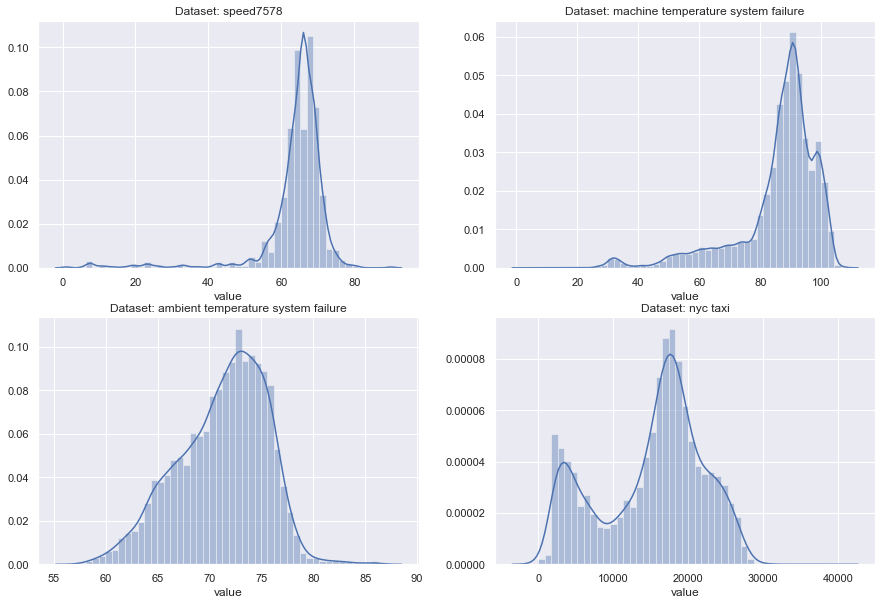

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics as default
sns.set()

#define plotting region (2 rows, 2 columns)
fig, axes = plt.subplots(2, 2, figsize=(15,10))

#create boxplot in each subplot
sns.distplot(sp['value'], ax=axes[0,0]).set(title='Dataset: speed7578')
sns.distplot(mt['value'], ax=axes[0,1]).set(title='Dataset: machine temperature system failure')
sns.distplot(at['value'], ax=axes[1,0]).set(title='Dataset: ambient temperature system failure')
sns.distplot(nt['value'], ax=axes[1,1]).set(title='Dataset: nyc taxi')

> map labels

In [19]:
obj2name = [
    (mt, 'realKnownCause/machine_temperature_system_failure.csv'),
    (sp, 'realTraffic/speed_7578.csv'),
    (at, 'realKnownCause/ambient_temperature_system_failure.csv'),
    (nt, 'realKnownCause/nyc_taxi.csv'),
]

In [20]:
for ds_obj, dataset in obj2name:
    ds_obj['anomaly'] = 0

    for w in labels[dataset]:
        anomalies_mask = (ds_obj['timestamp'] >= w[0]) & (ds_obj['timestamp'] <= w[1])
        ds_obj.loc[anomalies_mask, 'anomaly'] = 1

/Users/macbook/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


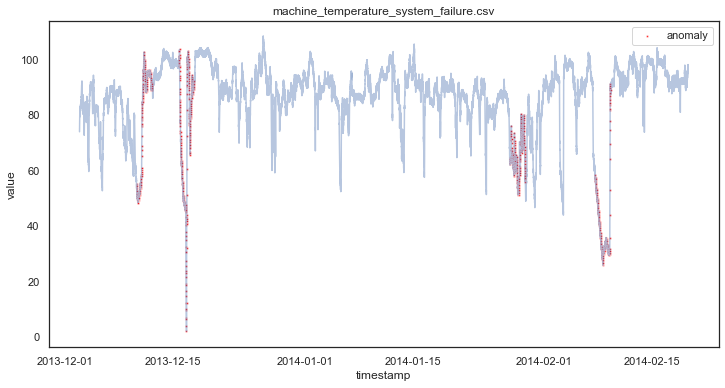

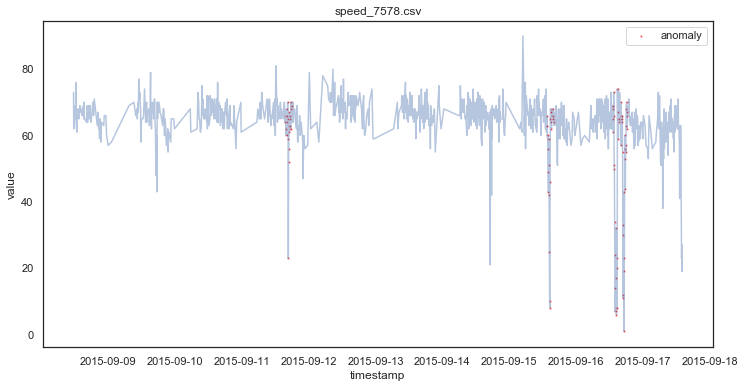

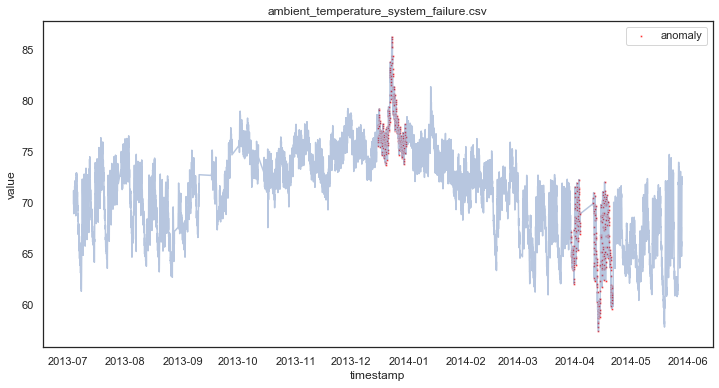

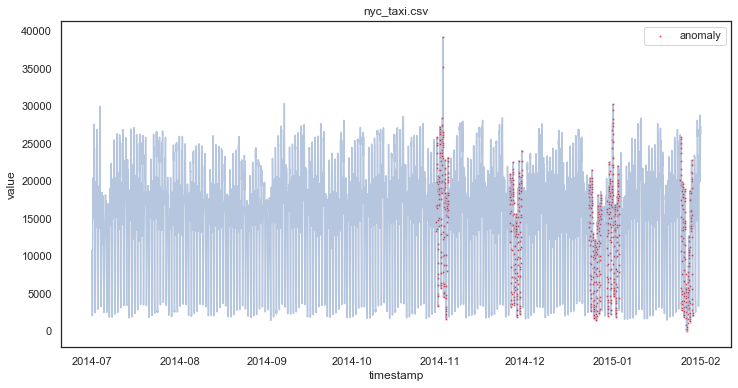

In [21]:
for ds_obj, dataset in obj2name:
    fig,axs=plt.subplots(figsize=(12, 6))
    sns.lineplot(x='timestamp', y='value', data=ds_obj, alpha=0.4)
    sns.scatterplot(x='timestamp', y='value', data=ds_obj[ds_obj['anomaly']==1],
                    color='red', label='anomaly', alpha=0.8, s=6)
#     plt.title('Machine temperature system failure anomalies');
    plt.title(dataset.split('/')[-1])
    plt.show()

## algorithms

need to repro
* Table 3 for elspot
* Table 4 and Table 5

### table 3

In [50]:
!pip install scikit-garden

     |████████████████████████████████| 317kB 1.3MB/s eta 0:00:01
  Stored in directory: /Users/macbook/Library/Caches/pip/wheels/d0/ef/71/3a032ba9a2b70690c9f9ec2e383afee6610f509af312ff2cf3
Successfully built scikit-garden


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from skgarden import RandomForestQuantileRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


ImportError: cannot import name 'six' from 'sklearn.externals' (/Users/macbook/anaconda3/lib/python3.7/site-packages/sklearn/externals/__init__.py)

In [52]:
prices

,Bergen,DK1,DK2,EE,FI,FRE,Hours,Kr.sand,LT,LV,Molde,Oslo,SE1,SE2,SE3,SE4,SYS,Tr.heim,Tromsø,Unnamed: 0
0,16.39,16.39,16.39,16.39,16.39,NaN,00 - 01,16.39,28.11,28.11,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,16.39,01-01-2016
1,16.04,16.04,16.04,16.04,16.04,NaN,01 - 02,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,16.04,01-01-2016
2,15.74,15.74,15.74,15.74,15.74,NaN,02 - 03,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,15.74,01-01-2016
3,15.57,15.57,15.57,15.57,15.57,NaN,03 - 04,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,15.57,01-01-2016
4,15.47,15.47,15.47,15.47,15.47,NaN,04 - 05,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,15.47,01-01-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8756,50.66,47.51,47.51,47.51,47.51,NaN,19 - 20,50.66,47.51,47.51,47.51,50.66,47.51,47.51,47.51,47.51,48.83,47.51,47.51,31-12-2018
8757,49.66,45.82,45.82,45.82,45.82,NaN,20 - 21,49.66,45.82,45.82,45.82,49.66,45.82,45.82,45.82,45.82,47.23,45.82,45.82,31-12-2018
8758,49.05,43.03,43.03,43.03,43.03,NaN,21 - 22,49.05,43.03,43.03,45.41,49.05,43.03,43.03,43.03,43.03,46.02,45.41,45.41,31-12-2018
8759,49.32,38.54,38.54,38.54,38.54,NaN,22 - 23,49.32,38.54,38.54,43.97,49.32,38.54,38.54,38.54,38.54,45.55,43.97,43.97,31-12-2018


In [ ]:
methods = {
    'QRF': RandomForestQuantileRegressor(),
    'GBR': GradientBoostingRegressor(),
    'ETR': ExtraTreesRegressor(),
}

In [ ]:
result_t3 = []

for method_name, model in methods.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns=[target, timestamp]), X[target],
            test_size=0.33, random_state=42,
            stratify=X[target],
        )
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        
        model.fit(X=X_train, y=y_train);
        y_pred = model.predict(X_test)
        
        MSE = mean_squared_error(y_actual=y_test, y_hat=y_pred)
        MAE = mean_absolute_error(y_test, y_pred)
        RMSE = mean_squared_error(y_test, y_pred, squared=False)
        r = r2_score(y_test, y_pred)
        
        result_t3.append([ds_name, method_name, MSE, MAE, RMSE, r])
        
result_t3 = pd.DataFrame(result_t3, columns=['Method', 'MSE', 'MAE', 'RMSE', 'R-score'])        

In [ ]:
result_t3

### table 4

In [22]:
# https://stackoverflow.com/a/31351145
def tpr_tnr(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
            TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
            FP += 1
        if y_actual[i]==y_hat[i]==0:
            TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
            FN += 1

    # https://en.wikipedia.org/wiki/Sensitivity_and_specificity 
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    FPR = FP/(FP+TN)
    return TPR, TNR, FPR

In [ ]:
# ![image.png](attachment:image.png)

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor

In [29]:
timestamp = 'timestamp'
target = 'anomaly'
current_value = 'value'

In [32]:
methods = {
    'kmeans': KMeans(),
    'iForest': IsolationForest(),
    'OCSVM': OneClassSVM(),
    'k-NN': KNeighborsClassifier(),
    'LOF': LocalOutlierFactor(novelty=True),
    
}
datasets = {
    'speed7578': sp,
    'nyc taxi': nt,
    'ambient temp': at,
    'machine temp': mt,
}

In [35]:
result_t4 = []
for ds_name, X in datasets.items():
    for method_name, model in methods.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns=[target, timestamp]), X[target],
            test_size=0.33, random_state=42,
            stratify=X[target],
        )
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        
        model.fit(X=X_train, y=y_train);
        y_pred = model.predict(X_test)
        TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
        AUC = roc_auc_score(y_test, y_pred)
        result_t4.append([ds_name, method_name, TPR, TNR, FPR, AUC])
        
result_t4 = pd.DataFrame(result_t4, columns=['Data', 'Method', 'TPR', 'TNR', 'FPR', 'AUC'])        

In [37]:
result_t4.loc[result_t4['Data'] == 'speed7578']

,Data,Method,TPR,TNR,FPR,AUC
0,speed7578,kmeans,0.777778,0.247191,0.752809,0.540537
1,speed7578,iForest,1.000000,0.000000,1.000000,0.352348
2,speed7578,OCSVM,1.000000,0.000000,1.000000,0.400095
3,speed7578,k-NN,0.210526,0.997006,0.002994,0.603766
4,speed7578,LOF,1.000000,0.000000,1.000000,0.477624


In [38]:
result_t4.loc[result_t4['Data'] == 'nyc taxi']

,Data,Method,TPR,TNR,FPR,AUC
5,nyc taxi,kmeans,0.450000,0.742282,0.257718,0.495327
6,nyc taxi,iForest,1.000000,0.000000,1.000000,0.436551
7,nyc taxi,OCSVM,1.000000,0.000000,1.000000,0.486979
8,nyc taxi,k-NN,0.023392,0.990862,0.009138,0.507127
9,nyc taxi,LOF,1.000000,0.000000,1.000000,0.495940


In [39]:
result_t4.loc[result_t4['Data'] == 'ambient temp']

,Data,Method,TPR,TNR,FPR,AUC
10,ambient temp,kmeans,0.373737,0.466667,0.533333,0.438451
11,ambient temp,iForest,1.000000,0.000000,1.000000,0.328512
12,ambient temp,OCSVM,1.000000,0.000000,1.000000,0.333439
13,ambient temp,k-NN,0.191667,0.979620,0.020380,0.585643
14,ambient temp,LOF,1.000000,0.000000,1.000000,0.492130


In [40]:
result_t4.loc[result_t4['Data'] == 'machine temp']

,Data,Method,TPR,TNR,FPR,AUC
15,machine temp,kmeans,0.701087,0.89090,0.10910,0.504751
16,machine temp,iForest,1.000000,0.00000,1.00000,0.231716
17,machine temp,OCSVM,1.000000,0.00000,1.00000,0.327845
18,machine temp,k-NN,0.431242,0.98205,0.01795,0.706646
19,machine temp,LOF,1.000000,0.00000,1.00000,0.494660


### table 5

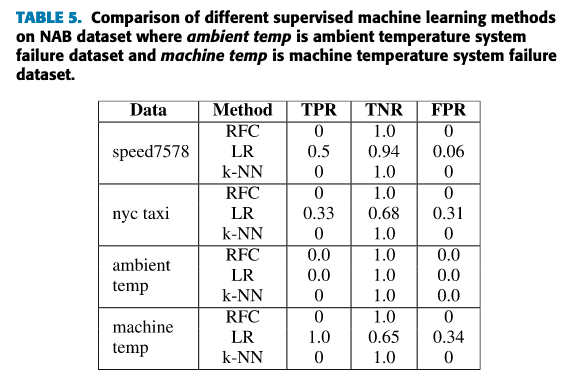

Logistic regression (LR) captured some outliers, but the Random
Forest classifier (RFC) and k-NN could not classify outliers
correctly in the test sets.

In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [202]:
timestamp = 'timestamp'
target = 'anomaly'
current_value = 'value'

In [198]:
X = mt.copy()

> example for 1 model

In [199]:
model = RandomForestClassifier(random_state=123)

In [219]:
X_train, X_test, y_train, y_test = train_test_split(
    X.drop(columns=[target, timestamp]), X[target],
    test_size=0.33, random_state=42,
    stratify=X[target],
)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [223]:
y_test.value_counts()/len(y_test)

0    0.9
1    0.1
Name: anomaly, dtype: float64

In [204]:
model.fit(X_train, y_train);

In [216]:
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # proba of the positive class

In [226]:
TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)

> Table 5

In [238]:
methods = {
    'RFC': RandomForestClassifier(),
    'LR': LogisticRegression(),
    'k-NN': KNeighborsClassifier(),
}
datasets = {
    'speed7578': sp,
    'nyc taxi': nt,
    'ambient temp': at,
    'machine temp': mt,
}

In [239]:
result_t5 = []
for ds_name, X in datasets.items():
    for method_name, model in methods.items():
        X_train, X_test, y_train, y_test = train_test_split(
            X.drop(columns=[target, timestamp]), X[target],
            test_size=0.33, random_state=42,
            stratify=X[target],
        )
        X_train = X_train.reset_index(drop=True)
        X_test = X_test.reset_index(drop=True)
        y_train = y_train.reset_index(drop=True)
        y_test = y_test.reset_index(drop=True)
        
        model.fit(X=X_train, y=y_train);
        y_pred = model.predict(X_test)
        TPR, TNR, FPR = tpr_tnr(y_actual=y_test, y_hat=y_pred)
        result_t5.append([ds_name, method_name, TPR, TNR, FPR])
        
result_t5 = pd.DataFrame(result_t5, columns=['Data', 'Method', 'TPR', 'TNR', 'FPR'])

In [240]:
result_t5

,Data,Method,TPR,TNR,FPR
0,speed7578,RFC,0.184211,0.997006,0.002994
1,speed7578,LR,0.210526,0.997006,0.002994
2,speed7578,k-NN,0.210526,0.997006,0.002994
3,nyc taxi,RFC,0.114035,0.919713,0.080287
4,nyc taxi,LR,0.000000,1.000000,0.000000
5,nyc taxi,k-NN,0.023392,0.992167,0.007833
6,ambient temp,RFC,0.266667,0.918481,0.081519
7,ambient temp,LR,0.000000,1.000000,0.000000
8,ambient temp,k-NN,0.191667,0.979620,0.020380
9,machine temp,RFC,0.445928,0.937398,0.062602
